In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
if not os.path.exists("Test_External_images"):
    
    os.makedirs("Test_External_images")
    
    print(f"Created Test_External_images")
    
else:
    print(f"Test_External_images is ready.")

Test_External_images is ready.


In [3]:
#Carga del modelo:
modelo = tf.keras.models.load_model("Modelos/cards_type/Quinto_modelo_cartas.keras")

modelo.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 224, 224, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 112, 112, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 112, 112, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 56, 56, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 53)             │         6,837 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,947,009 (37.94 MB)

 Trainable params: 3,315,669 (12.65 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,631,340 (25.30 MB)

In [4]:
#Carga de etiquetas:

dataset_dir = os.path.join(os.getcwd(), "dataset")

valid_dir = os.path.join(dataset_dir, "valid")

val_ds = tf.keras.utils.image_dataset_from_directory(
    valid_dir,
    label_mode="categorical",)

class_names = val_ds.class_names  

Found 265 files belonging to 53 classes.


Procesando: 13-poker-cards-png.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step


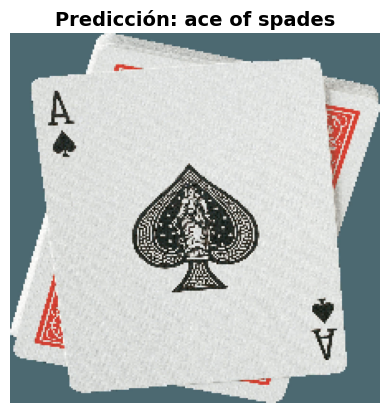

Procesando: 1e9e59b0d6f684908f3ad7d2fe942a42.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


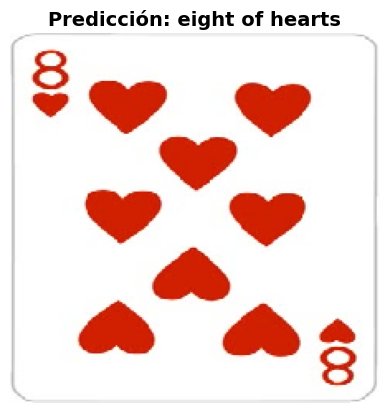

Procesando: 25103838e73369b29f9d82ee22eb0b83.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


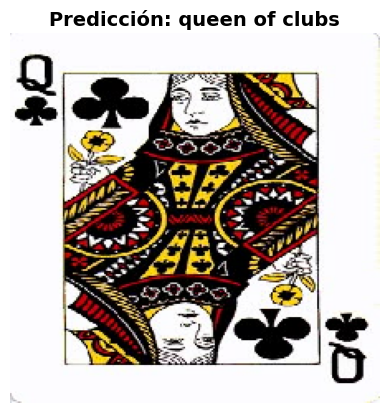

Procesando: 30-playing-cards-png (1).jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


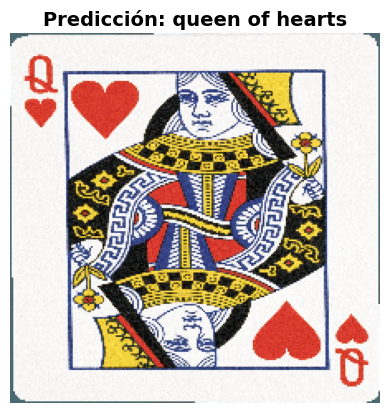

Procesando: 34146a8954e9c921d806b05e29ce07c7.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


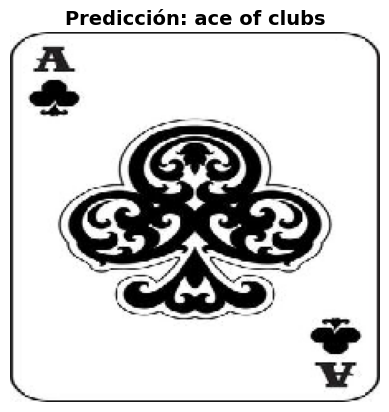

Procesando: 58d872f063752027e59e15af4d090123.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


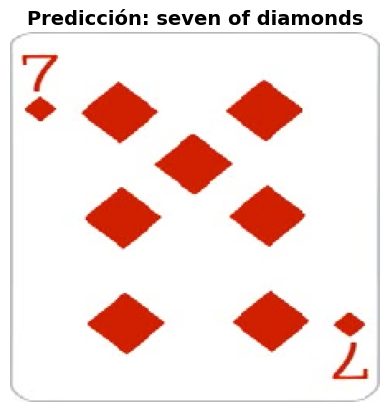

Procesando: 6ed5bf64f008d72e83c67f81468ab7c5.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


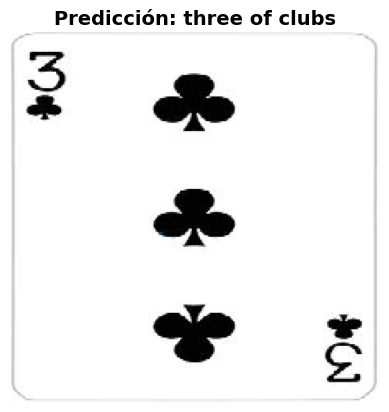

Procesando: 6fdb2d1c36b1fcb77d80a4acaa53925e.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


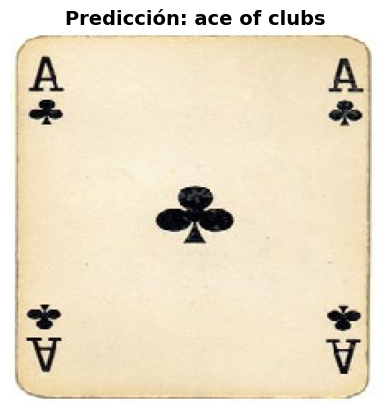

Procesando: 7a9a6c90dc4480914465a0f48a1df46d.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


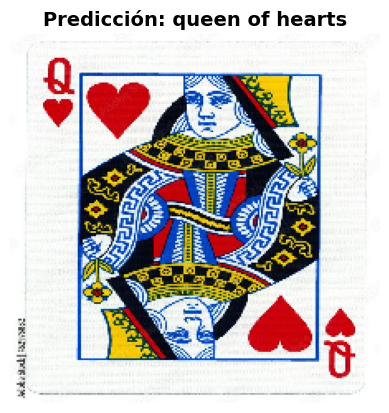

Procesando: 7d808030ca7fa15d8c2eeefe2efb850d.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


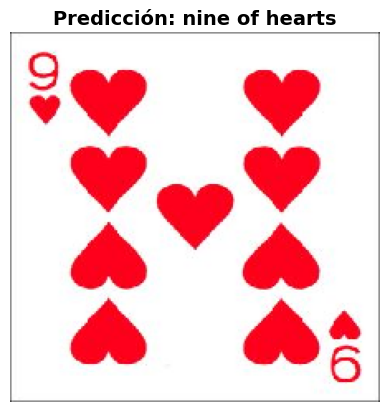

Procesando: 94b514c2d50053d5231aaec9e46776d5.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


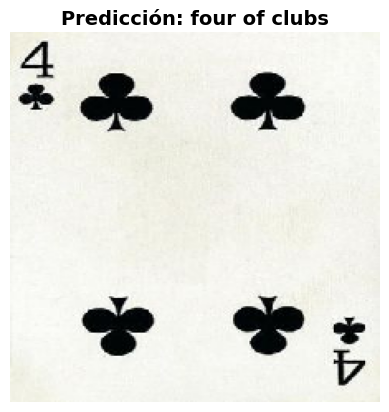

Procesando: 95e6cb18307cdbbef6bbdb226ab6a39c.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


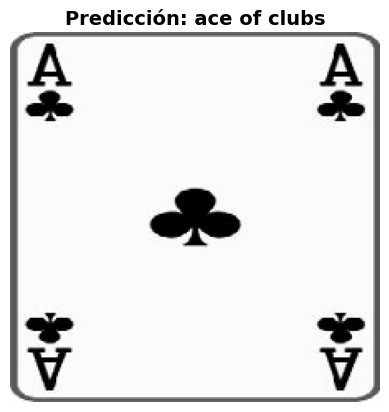

Procesando: 963f4ff5a2a1488252fc3d098f420db3.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


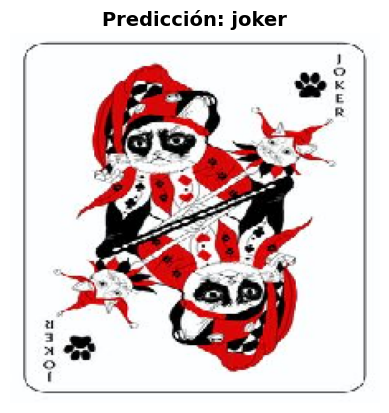

Procesando: 9e0f40b06d9c753d2cbacb3f4d4dc4e1.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


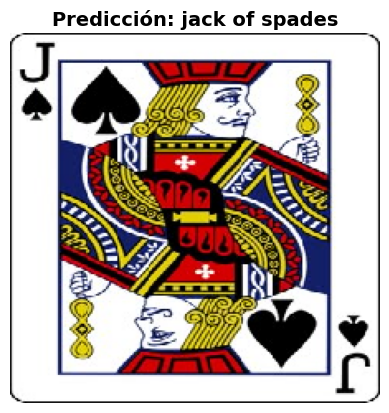

Procesando: 9fae03035708e817c02aad2b4cc64f4b.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


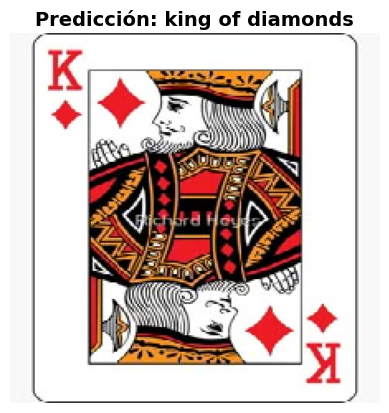

Procesando: c537ed8936f40b5559ba9b075b2f10b8.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


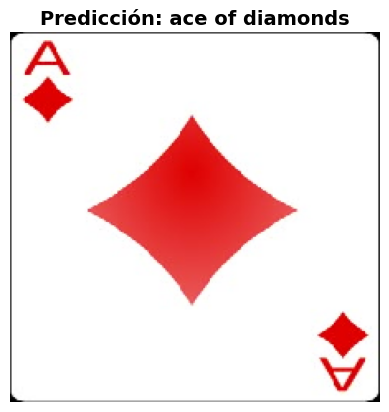

Procesando: dd17cb0f0e436fa60ace35306478a32d.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


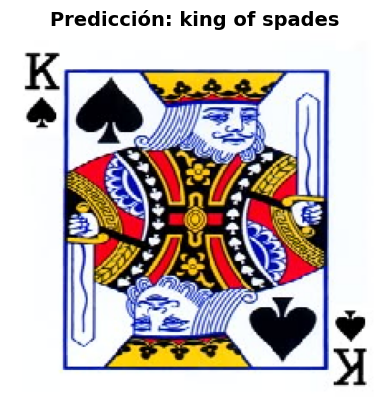

Procesando: dd7a7976a5f561a1e27701521bc19697.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


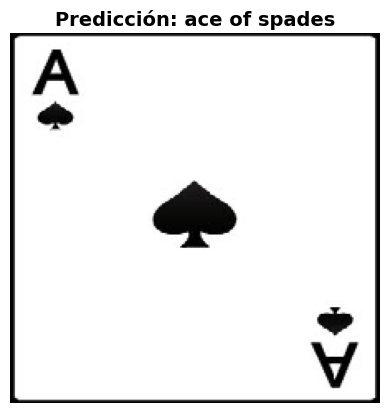

Procesando: e0f6a54304f1d76b665096dbf4b31a94.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


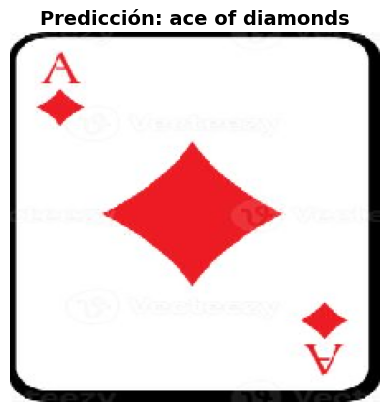

Procesando: ebe434953cb5c82ec5c8e38b8e735489.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


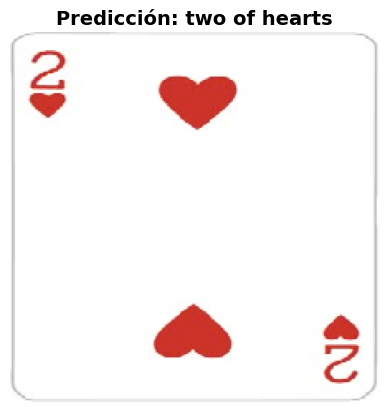

Procesando: ebed60df503423f24b5c93e012e81ed6.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


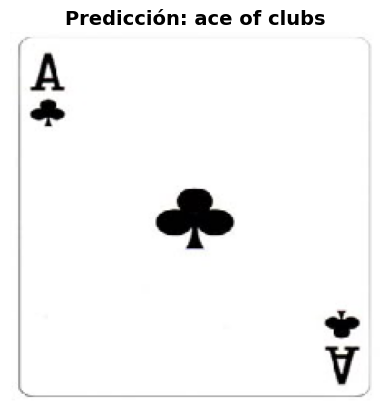

Procesando: ef8552c01ae88928b2cac3a770496bdb.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


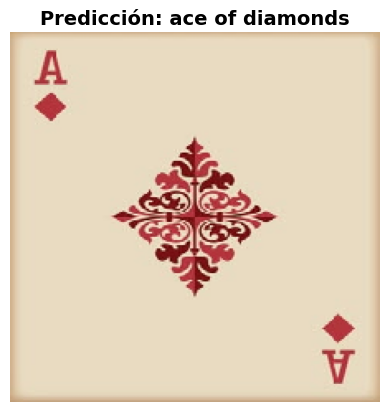

In [5]:
#Definición directorios
dataset_dir = os.path.join(os.getcwd(), "dataset")

# Parámetros de preprocesamiento
img_height = 224
img_width = 224

def predecir_imagen(ruta_imagen):

    img = tf.keras.preprocessing.image.load_img(ruta_imagen, target_size=(img_height, img_width))
    
    # Convertir a array, normalizar y ajuste.
    img_array = tf.keras.preprocessing.image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    
    # Hacer predicción
    predicciones = modelo.predict(img_array)
    indice_predicho = np.argmax(predicciones)  # Obtener índice de la clase más probable
    clase_predicha = class_names[indice_predicho]  # Obtener el nombre de la clase
    
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Predicción: {clase_predicha}", fontsize=14, fontweight="bold")
    plt.show()
    
    return clase_predicha

# Obtener y probar imagenes.
imagenes = [f for f in os.listdir("Test_External_images") if f.lower().endswith((".jpg", ".png", ".jpeg"))]

for img in imagenes:
    print(f"Procesando: {img}")
    predecir_imagen(os.path.join("Test_External_images", img))